In [11]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
X = load_iris().data

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
Y = load_iris().target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X_train,x_test, y_train, y_test = tts(X,Y, test_size = 0.15)

In [8]:
clf = LogisticRegression()

In [9]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = clf.predict(x_test)

In [12]:
confu = confusion_matrix(y_test,y_pred)
confu

array([[ 5,  0,  0],
       [ 0,  5,  0],
       [ 0,  1, 12]], dtype=int64)

<AxesSubplot:>

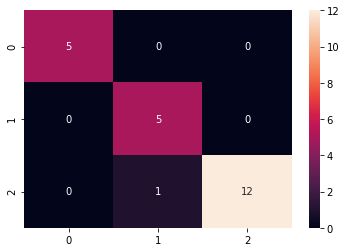

In [14]:
sns.heatmap(confu, annot=True)

![](data/confu.jpg)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

In [16]:
accuracy_score(y_test,y_pred)

0.9565217391304348

In [23]:
roc_auc_score(y_test,y_pred, average = 'macro')

ValueError: multi_class must be in ('ovo', 'ovr')

In [22]:
precision_score(y_test,y_pred, average='macro')

0.9444444444444445

In [26]:
X = load_boston().data
Y = load_boston().target

X_train,x_test, y_train, y_test = tts(X,Y, test_size = 0.15)

linreg = LinReg()

In [27]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.6912726379060521

In [30]:
from sklearn.metrics import mean_squared_error as mse

In [31]:
mse(y_test,y_pred)

29.941655428040953

In [32]:
mse(y_test,y_pred, squared=False)

5.471896876590508

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [35]:
grid_param = {
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'n_jobs':[i for i in range(5,100,5)]
 }

In [36]:
linreg_grid = GridSearchCV(LinReg(), grid_param)#DEfinicion de usar gridsearch con el modelo LinReg

In [37]:
grid_random_linreg = linreg_grid.fit(X_train,y_train) #Entrenamiento

In [38]:
grid_random_linreg.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=True)

In [41]:
dic_best_params = grid_random_linreg.best_params_
dic_best_params

{'fit_intercept': True, 'n_jobs': 5, 'normalize': True}

In [48]:
linreg_tuned = LinReg(**dic_best_params) #defini mi modelo con los mejores parametros
linreg_tuned = linreg_tuned.fit(X_train,y_train) #entreno

y_pred_best = linreg_tuned.predict(x_test) #predigo

In [49]:
r2_score(y_test,y_pred_best)

0.6912726379060508

In [50]:
from sklearn.model_selection import cross_val_score

![](data/grid_search_cross_validation.png)

In [54]:
scores = cross_val_score(linreg_tuned,X,Y, cv = 5)
scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])